# Problem Statement

Customer Churn is a burning problem for Telecom companies. Almost every telecom company pays a premium to get a customer on-board. Customer churn directly impacts company’s revenue.
  
In this case-study, we simulate one such case of customer churn where we work on a data of post-paid customers with a contract. The data has information about customer usage behaviour, contract details, and payment details. The data also indicates which were the customers who cancelled their service.  
  
Based on this past data, Perform an EDA and build a model which can predict whether a customer will cancel their service in the future or not.

# Data Dictionary

* <b>Churn</b> - 1 if customer cancelled service, 0 if not

* <b>AccountWeeks</b> - number of weeks customer has had active account

* <b>ContractRenewal</b> - 1 if customer recently renewed contract, 0 if not

* <b>DataPlan</b> - 1 if customer has data plan, 0 if not

* <b>DataUsage</b> - gigabytes of monthly data usage

* <b>CustServCalls</b> - number of calls into customer service

* <b>DayMins</b> - average daytime minutes per month

* <b>DayCalls</b> - average number of daytime calls

* <b>MonthlyCharge</b> - average monthly bill

* <b>OverageFee</b> - largest overage fee in last 12 months

* <b>RoamMins</b> - average number of roaming minutes


# Import Libraries

We now import the required libraries.

In [2]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style='white')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,f1_score, recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
cell_df = pd.read_excel('Cellphone.xlsx')

# EDA

## Head

In [4]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


## Data Types

In [5]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3303 non-null   float64
 2   ContractRenewal  3315 non-null   float64
 3   DataPlan         3324 non-null   float64
 4   DataUsage        3317 non-null   float64
 5   CustServCalls    3281 non-null   float64
 6   DayMins          3298 non-null   float64
 7   DayCalls         3322 non-null   float64
 8   MonthlyCharge    3320 non-null   float64
 9   OverageFee       3309 non-null   float64
 10  RoamMins         3326 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 286.6 KB


There are missing values in some coumns.  
All variables are of numeric type and does not contain any data inconsistencies (causing numeric variables to be object due to some special characters present in the data).  
Churn is the target variable.   
Churn, ContractRenewal and DataPlan are binary variables.

## Statistical Summary

In [6]:
numcols = ['AccountWeeks','DataUsage','CustServCalls',
           'DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']

In [7]:
cell_df[numcols].describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
AccountWeeks,3303.0,101.0,40.0,1.0,74.0,101.0,127.0,243.0
DataUsage,3317.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0
CustServCalls,3281.0,2.0,1.0,0.0,1.0,1.0,2.0,9.0
DayMins,3298.0,180.0,55.0,0.0,144.0,180.0,217.0,351.0
DayCalls,3322.0,100.0,20.0,0.0,87.0,101.0,114.0,165.0
MonthlyCharge,3320.0,56.0,16.0,14.0,45.0,54.0,66.0,111.0
OverageFee,3309.0,10.0,3.0,0.0,8.0,10.0,12.0,18.0
RoamMins,3326.0,10.0,3.0,0.0,8.0,10.0,12.0,20.0


## Check for Missing values

In [8]:
cell_df.isnull().sum()

Churn               0
AccountWeeks       30
ContractRenewal    18
DataPlan            9
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

### Imputing missing values

Since, ContractRenewal and DataPlan are binary, we cannot substitute with mean values for these 2 variables. We will impute these two variables with their respective modal values.

In [9]:
catcols = ['ContractRenewal','DataPlan']

for column in catcols:
    print(column)
    mode_1 = cell_df[column].mode()[0]
    print(mode_1)
    cell_df[column].fillna(value=mode_1,inplace=True)
    
cell_df.isnull().sum()

ContractRenewal
1.0
DataPlan
0.0


Churn               0
AccountWeeks       30
ContractRenewal     0
DataPlan            0
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

Now let us impute the rest of the continuous variables with the median. For that we are going to use the SimpleImputer sub module from sklearn.

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
SI = SimpleImputer(strategy='median')

In [12]:
# after imputing, the SimpleImputer returns an array of the values
# so we put it back in the form of a dataframe with original col names
cell_df = pd.DataFrame(SI.fit_transform(cell_df),
                       columns=cell_df.columns)

In [13]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [14]:
cell_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

## Checking for Duplicates

In [15]:
# Are there any duplicates ?
dups = cell_df.duplicated()
dups.sum()

0

## Proportion of the Target classes

In [16]:
cell_df.Churn.value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: Churn, dtype: float64

## Univariate Analysis

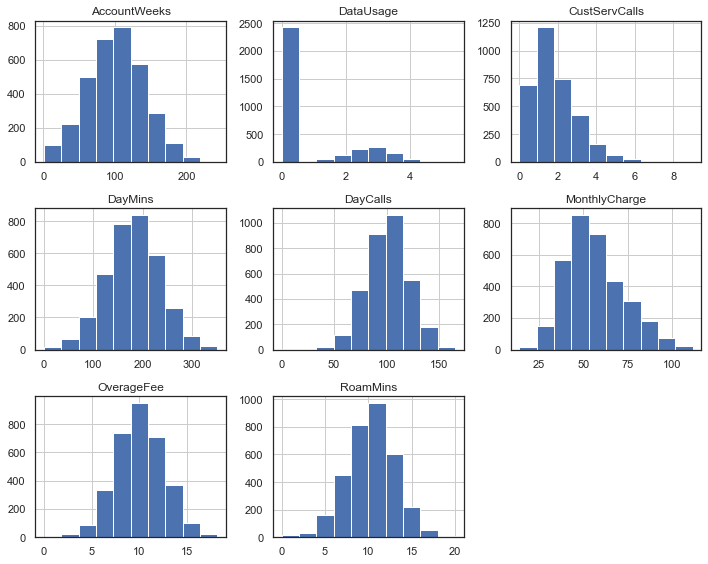

In [17]:
cell_df[numcols].hist(figsize=(10,8))
plt.tight_layout()

## Outlier Checks

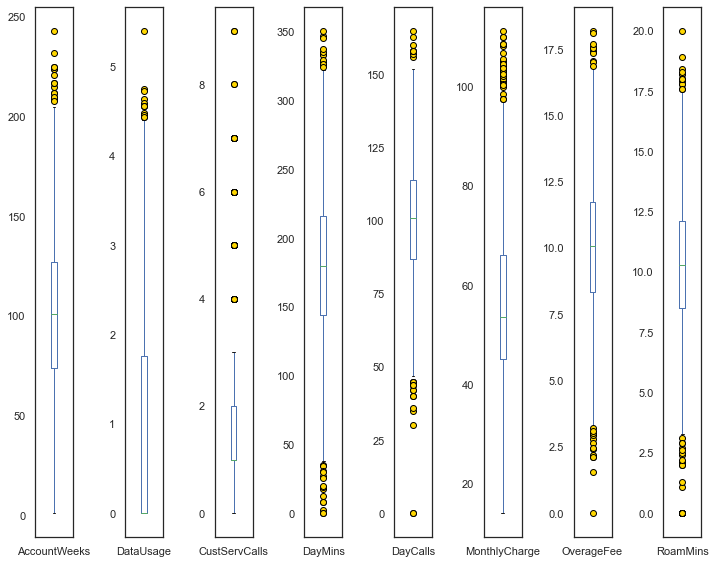

In [18]:
cell_df[numcols].plot(kind = 'box', subplots = True,figsize=(10,8))
# plt.xticks(rotation =45)
plt.tight_layout();

In [ ]:
# Alternate way... plotting the boxplots one by one
# for i in cols:
#     sns.boxplot(cell_df[i])
#     plt.show()

## Bi-Variate Analysis with Target variable

### Account Weeks and Churn

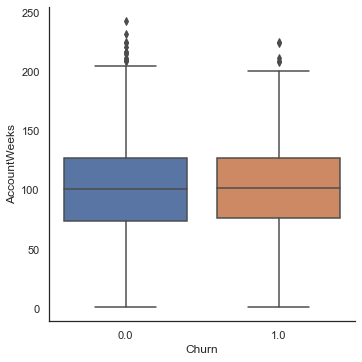

In [19]:
sns.catplot(data = cell_df, x='Churn',y='AccountWeeks',
           kind = 'box');

AccountWeeks shows similar distribution between churn and no churn, and is normally distributed

### Data Usage against Churn

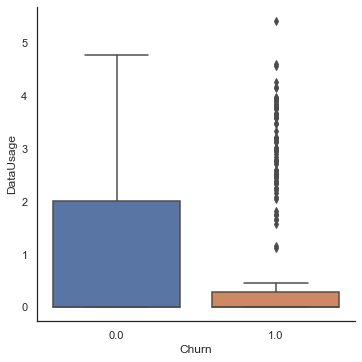

In [20]:
sns.catplot(data = cell_df, x = 'Churn', y = 'DataUsage',
           kind = 'box');

DataUsage shows clear distinction between churn and no churn. Customers who has not churned shows a wider distribution indicating more data usage. Whereas customers who has churned has smaller distribution (mostly near data usage 0) with many outliers indicating few customers who has more data usage still has churned

### DayMins against Churn

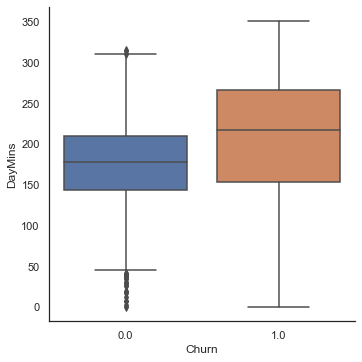

In [21]:
sns.catplot(data = cell_df, x = 'Churn', y = 'DayMins',
           kind = 'box');

DayMins shows distinction between churn and no churn, and both are normally distributed with little skewness. Distribution is much wider for churn than no churn

### DayCalls against Churn

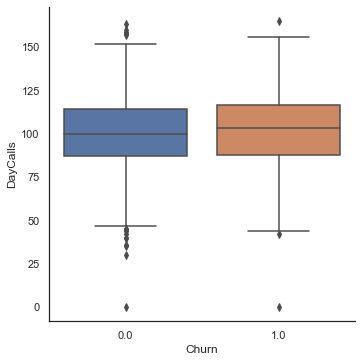

In [22]:
sns.catplot(data = cell_df, x = 'Churn', y = 'DayCalls',
           kind = 'box');

DayCalls shows similar distribution between churn and no churn, and is normally distributed

### MonthlyCharge against Churn

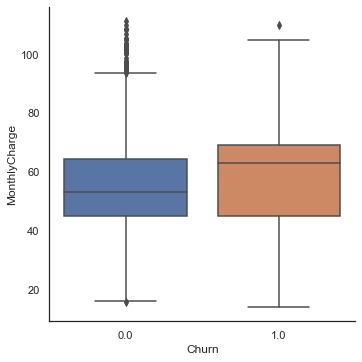

In [23]:
sns.catplot(data = cell_df, x = 'Churn', y = 'MonthlyCharge',
           kind = 'box');

MonthlyCharge shows some skewness in the distribution between churn and no churn. Distribution is much wider for churn indicating more monthly charge means more churn. Median of churn is higher than no churn

### OverageFee against Churn

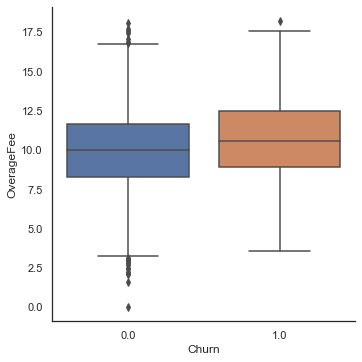

In [24]:
sns.catplot(data = cell_df, x = 'Churn', y = 'OverageFee',
           kind = 'box');

Distribution is almost similar between churn and no churn

### RoamMins against Churn

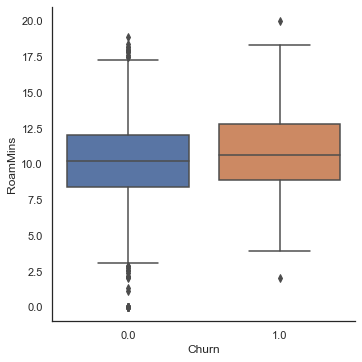

In [25]:
sns.catplot(data = cell_df, x = 'Churn', y = 'RoamMins',
           kind = 'box');

Distribution is almost similar between churn and no churn. Medians are almost same

### CustServCalls against Churn

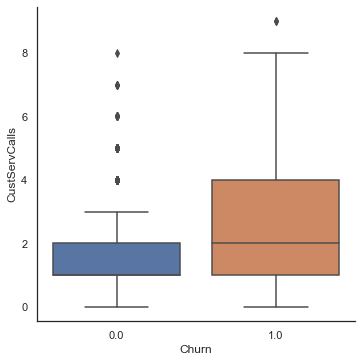

In [26]:
sns.catplot(data = cell_df, x = 'Churn', y = 'CustServCalls',
           kind = 'box');

Distribution much wider for churn and lesser for no churn. More CustServCalls indicates more churn.

### Contract Renewal against Churn

In [27]:
# cross tabulation
tab = pd.crosstab(cell_df['ContractRenewal'], 
                  cell_df['Churn'],normalize='index').round(2)*100
tab

Churn,0.0,1.0
ContractRenewal,,
0.0,57.0,43.0
1.0,89.0,11.0


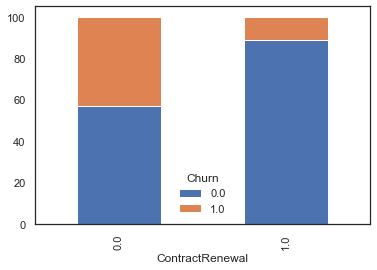

In [28]:
tab.plot(kind='bar',stacked=True);

The contract renewal is totally opposite to the churn as the churn value of 0 shows that the user not cancelled the service whereas the contract renewal of value 0 shows that user has not renewed the contract.  
When customers has not renewed the contract, count of churn and no churn is almost same.  
More customers who has renewed the contract has not churned.

### Data Plan against Churn

In [29]:
tab = pd.crosstab(cell_df['DataPlan'],cell_df['Churn'], normalize='index').round(2)*100
tab

Churn,0.0,1.0
DataPlan,,
0.0,83.0,17.0
1.0,91.0,9.0


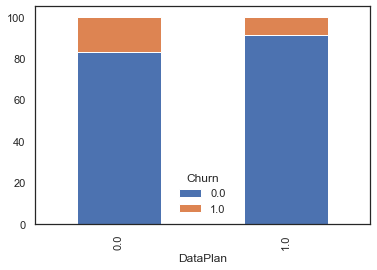

In [30]:
tab.plot(kind='bar', stacked='True');

Very few people have opted for having a data plan. Almost one-fifth of the customers have churned irrespective of having a data plan nor not. There isn't any significant difference between churn and no churn here.

# Train - Test Split

In [31]:
# Creating a copy of the original data frame
df = cell_df.copy()

In [32]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [33]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.30,
                                               random_state=1,
                                               stratify = y)

In [35]:
# target variable class proportions
y_train.value_counts(1)

0.0    0.855122
1.0    0.144878
Name: Churn, dtype: float64

In [36]:
y_test.value_counts(1)

0.0    0.855
1.0    0.145
Name: Churn, dtype: float64

# Linear Discriminant Analysis

In [37]:
#Build LDA Model & Train
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

## Prediction

In [38]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

## Confusion Matrix Comparison

In [39]:
from sklearn.metrics import plot_confusion_matrix,classification_report, plot_roc_curve

### Train Data

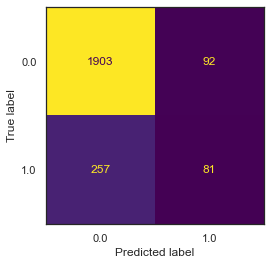

In [40]:
plot_confusion_matrix(model,X_train,y_train,colorbar = False);

### Test Data

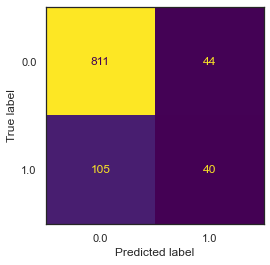

In [41]:
plot_confusion_matrix(model,X_test,y_test, colorbar=False);

## Classification Report Comparison

In [42]:
print(classification_report(y_train,pred_class_train))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1995
         1.0       0.47      0.24      0.32       338

    accuracy                           0.85      2333
   macro avg       0.67      0.60      0.62      2333
weighted avg       0.82      0.85      0.83      2333



In [43]:
print(classification_report(y_test,pred_class_test))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       855
         1.0       0.48      0.28      0.35       145

    accuracy                           0.85      1000
   macro avg       0.68      0.61      0.63      1000
weighted avg       0.83      0.85      0.83      1000



## Probability prediction for the training and test data

In [ ]:
# from sklearn.metrics import roc_auc_score

In [44]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

# auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
# auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

In [45]:
pred_train_prob 
# we are interested in the probability of the class being 1, hence we will be extracting the second column in the output below using pred_train_prob[:,1]
# using pred_train_prob[:,1][0] gives the prob prediction for the first row, pred_train_prob[:,1][1] gives the prob prediction for the second row and so on. 

array([[0.97930068, 0.02069932],
       [0.79820584, 0.20179416],
       [0.84577452, 0.15422548],
       ...,
       [0.89941904, 0.10058096],
       [0.83266024, 0.16733976],
       [0.9471653 , 0.0528347 ]])

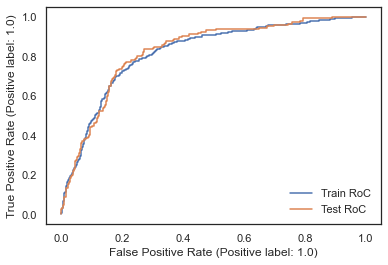

In [46]:
fig,ax = plt.subplots()
plot_roc_curve(model,X_train,y_train,label='Train RoC', ax=ax)
plot_roc_curve(model,X_test,y_test,label='Test RoC',ax=ax);

# Conclusion

The model accuracy on the training as well as the test set is about 85%, which is roughly the same proportion as the class 0 observations in the dataset. 
This model is affected by a class imbalance problem.
Since we only have 3333 observations, if re-build the same LDA model with more number of data points, an even better model could be built.

We will learn about how to address the class imbalance problem in the Machine Learning module week 2.

Please do go ahead ad try to build other classification algorithms learnt so far in the course and compare the performances of those.

# Changing Default Threshold Probability

We will do this exercise only on the training data and take the best cut off value for whatever evaluation metric we choose. Then this selected threshold(cut-off) probability is used to work out the classification predictions from the test data probability predictions.

In [52]:
from sklearn.metrics import precision_score

In [54]:
# A function to evaluate accuracy,f1,recall for each threshold prob and return a data frame with all these metrics. It takes the train data probability predictions as input

def custom_threshold_metrics(pred_train_prob):
    thresh = [] # empty list to store threshold prob values
    acc = [] # empty list to store accuracy for various threshold values
    f1_scr = [] # empty list to store F1 score for various...
    rec = [] # empty list to store recall score for various...
    prec =[]

    for thresh_prob in np.arange(0.1,1,0.1):
        thresh.append(thresh_prob)
        custom_cutoff_pred=[]#defining an empty list to store category predictions
        
        #defining a loop for the length of the test data
        for i in range(0,len(y_train)):
            #checking the condition for our probability values to be greater                           than the custom cutoff/threshold probability value
            if pred_train_prob[:,1][i] > thresh_prob:
                a=1 # if predicted prob > threshold then predict category 1
            else:
                a=0 # else predict 0
            # add category predictions of train data for given threshold
            custom_cutoff_pred.append(a)
        acc.append(np.round(accuracy_score(y_train,custom_cutoff_pred),3))
        f1_scr.append(np.round(f1_score(y_train,custom_cutoff_pred),3))
        rec.append(np.round(recall_score(y_train,custom_cutoff_pred),3))
        prec.append(np.round(precision_score(y_train,custom_cutoff_pred),3))
        
        # add a line for precision
    # put it all in a dataframe for easy comparison
    df_eval = pd.DataFrame({'threshold_prob':thresh,
                           'Acc':acc,
                           'f1':f1_scr,
                           'recall':rec,
                           'precision':prec})
    return df_eval


In [55]:
custom_threshold_metrics(pred_train_prob)

,threshold_prob,Acc,f1,recall,precision
0,0.1,0.717,0.455,0.817,0.315
1,0.2,0.819,0.495,0.612,0.416
2,0.3,0.843,0.440,0.426,0.456
3,0.4,0.845,0.365,0.308,0.448
4,0.5,0.850,0.317,0.240,0.468
5,0.6,0.857,0.281,0.192,0.520
6,0.7,0.861,0.221,0.136,0.590
7,0.8,0.860,0.138,0.077,0.650
8,0.9,0.856,0.035,0.018,0.667


We see that <b>0.7 and 0.8 gives better accuracy</b> than the rest of the custom cut-off values. But <b>0.2 cut-off gives us the best 'f1-score'</b>. <b>0.1 gives the best recall score</b>. Here, assuming we want a model that performs best on F1 Score, we will take the cut-off as 0.1 to get the optimum 'recall' score. 

The selection of the preferred threshold probability should be done based on training data preductions only.
Let us evaluate the predictions of the test data made using these cut-off values.

In [49]:
#Predicting the classes on the test data

test_pred_custom_cutoff=[]
for i in range(len(pred_test_prob)):
    if pred_test_prob[:,1][i] > 0.1: # for best recall performace
        a = 1
    else:
        a = 0
    test_pred_custom_cutoff.append(a)


In [50]:
test_pred_custom_cutoff[:10]

[0, 0, 0, 1, 1, 0, 1, 1, 0, 0]

In [51]:
print('Classification Report of the default cut-off test data:\n\n',
      classification_report(y_test,pred_class_test),'\n\n\n')

print('Classification Report of the custom cut-off test data:\n\n',
      classification_report(y_test,test_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       855
         1.0       0.48      0.28      0.35       145

    accuracy                           0.85      1000
   macro avg       0.68      0.61      0.63      1000
weighted avg       0.83      0.85      0.83      1000
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.96      0.70      0.81       855
         1.0       0.32      0.84      0.46       145

    accuracy                           0.72      1000
   macro avg       0.64      0.77      0.64      1000
weighted avg       0.87      0.72      0.76      1000
 



As a practice, You can try comparing the classification report of train and test predictions by taking the best threshold probability (0.7 or 0.8) for Accuracy Score  and repeat the exercise for f1 (threshold probaility = 0.2).

In [72]:
betas = model.coef_.reshape(1,10) # beta coefficients estimates of the model

In [71]:
# 1st observation(row) in the training dataset
obs = np.array(X_train.iloc[0,:]).reshape(10,1)

In [75]:
# discriminant score of the first observation

np.matmul(betas,obs) # matrix multiplication

array([[0.76452466]])

In [78]:
# Alternative (better way ) of getting the discriminant scores of each observation
disc_scores = (model.coef_*X_train).sum(axis=1) # beta* respective x values for each observation

In [79]:
# sample discriminant scores
disc_scores[:10]

21      0.764525
2750    3.246144
379     2.919426
1988    0.561269
3008    5.131909
1703    0.548821
2299    1.580116
3213    3.746351
1275    1.920952
189     1.097906
dtype: float64

In [80]:
# you can add it to the dataframe if you want

X_train['DiscScore'] = disc_scores

In [81]:
X_train.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DiscScore
21,30.0,1.0,1.0,1.78,0.0,217.4,74.0,73.8,10.69,6.6,0.764525
2750,60.0,1.0,0.0,0.27,2.0,203.2,99.0,57.7,11.79,15.1,3.246144
379,122.0,1.0,0.0,0.00,1.0,231.2,141.0,63.0,13.39,8.8,2.919426
1988,77.0,1.0,0.0,0.00,1.0,67.7,68.0,29.0,9.79,12.0,0.561269
3008,55.0,0.0,0.0,0.00,1.0,221.0,115.0,52.0,8.27,9.7,5.131909


In [85]:
new_df = pd.concat([X_train,y_train], axis=1)
new_df

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DiscScore,Churn
21,30.0,1.0,1.0,1.78,0.0,217.4,74.0,73.8,10.69,6.6,0.764525,0.0
2750,60.0,1.0,0.0,0.27,2.0,203.2,99.0,57.7,11.79,15.1,3.246144,0.0
379,122.0,1.0,0.0,0.00,1.0,231.2,141.0,63.0,13.39,8.8,2.919426,1.0
1988,77.0,1.0,0.0,0.00,1.0,67.7,68.0,29.0,9.79,12.0,0.561269,0.0
3008,55.0,0.0,0.0,0.00,1.0,221.0,115.0,52.0,8.27,9.7,5.131909,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
469,36.0,1.0,0.0,0.00,1.0,178.6,83.0,49.0,10.66,10.9,1.945847,0.0
3054,123.0,1.0,1.0,1.78,3.0,212.3,77.0,75.8,12.58,6.6,2.682594,0.0
2637,46.0,1.0,0.0,0.26,2.0,214.1,72.0,53.6,8.22,8.2,2.430477,0.0
1722,171.0,1.0,0.0,0.00,1.0,270.5,69.0,66.0,11.50,9.6,3.016663,1.0


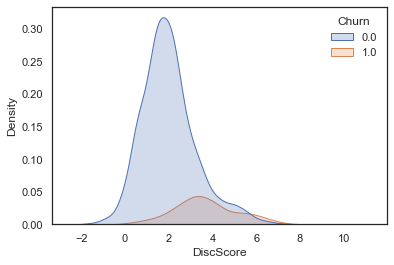

In [87]:
# plot discriminant score vs the tgt variable class

sns.kdeplot(data=new_df, x = 'DiscScore', hue='Churn', fill= True);

The best possible separation arrived at by the optimum values of the beta coefficients still shows that there is a lot of overlap betwen churn and non-churn classes. Which is why the model performed poorly.

<p style = 'color:red'><b> HAPPY LEARNING </b> </p>